In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras 

C:\Users\reshm\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

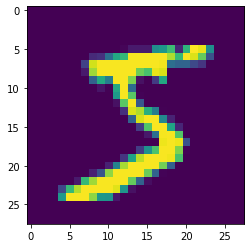

In [9]:
plt.imshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Very simple neural network with no hidden layers

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4650 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9253


In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9268


[0.26760515570640564, 0.926800012588501]

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.1290436e-02, 2.6161763e-07, 8.8277884e-02, 9.5839721e-01,
       2.1685564e-03, 1.0525900e-01, 1.7918849e-06, 9.9977052e-01,
       9.3707725e-02, 6.7420167e-01], dtype=float32)

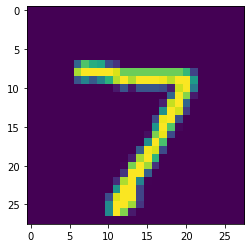

In [20]:
plt.imshow(X_test[0])

In [21]:
np.argmax(y_predicted[0])

7

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [24]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(114.0, 0.5, 'truth')

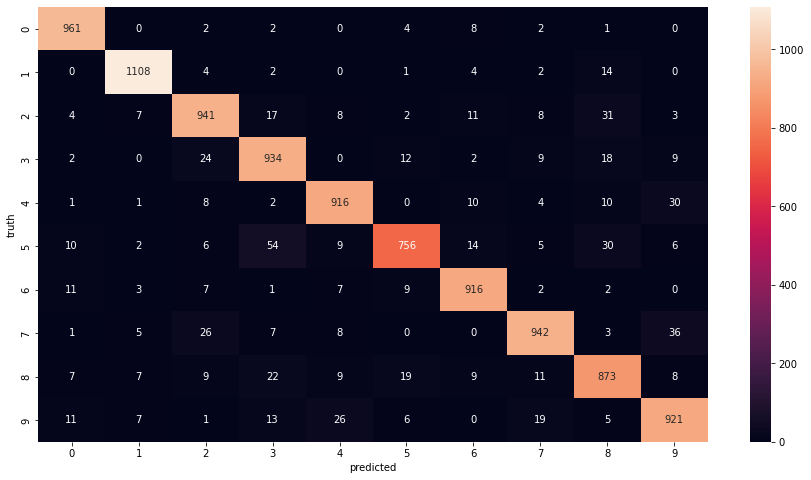

In [30]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
#this heatmap showing that 961 times the model is predicting to be 0,1108 times the models are predicting to be 1
#the true value is 2 but the model is 7times predicting wrong as 1

# Using hidden layer

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2684 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1210 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0857 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0517 - accuracy: 0.9844


In [ ]:
#the accuracy has improved after applying hidden layers

In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0823 - accuracy: 0.9746


[0.08230042457580566, 0.9746000170707703]

313/313 [==============================] - 2s 5ms/step


Text(69.0, 0.5, 'Truth')

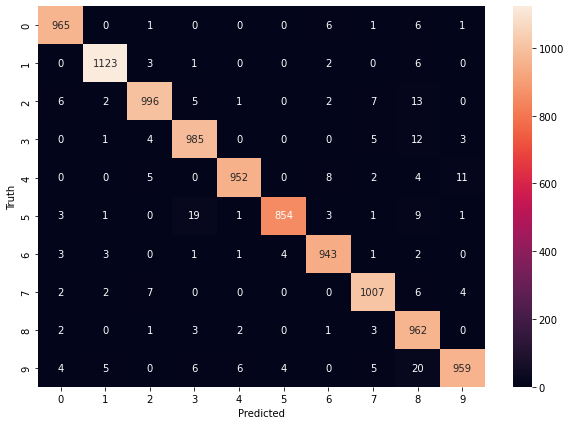

In [34]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#the wrong predicted numbers aslo comparitively reduced

# Using Flatten layer so that we don't have to call reshape on input dataset

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2726 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1259 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0887 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0431 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0351 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l